In [2]:
import numpy as np
import pandas as pd
import pickle
import os
import torch
import torch.nn
import torch.nn.functional as F
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
device = 'cuda:1'


# Heatmap of p values

In [3]:
stats_dict = {'cifar10': [np.zeros((11, 11)) for i in range(10)],
              'cifar100': [np.zeros((11, 11)) for i in range(10)],
              'tinyimagenet': [np.zeros((11, 11)) for i in range(10)],
             }

# Full confidence score

In [49]:
cifar10_archi1_pred = pickle.load(open("../results/model_distance/cifar10_predict_resnet18_0.0.pkl", "rb"))
cifar10_archi2_pred = pickle.load(open("../results/model_distance/cifar10_predict_vgg13_0.0.pkl", "rb"))

In [50]:
inters = sorted(list(cifar10_archi1_pred.keys()))[:-1]
vic_mean9 = cifar10_archi1_pred['vic'].mean(dim=0)
heat_matrix_cifar10 = np.zeros((11, 11))
for i, inter_target in enumerate(inters):
    print("-"*90)
    int_mean9 = cifar10_archi1_pred[inter_target]
#     dist_mean9 = torch.sum((int_mean9[:, :10] - vic_mean9[:, :10])**2, dim=1).cpu().numpy()[:500]
    dist_mean9 = torch.sum((int_mean9 - vic_mean9.unsqueeze(0).expand(
            10, vic_mean9.shape[0], vic_mean9.shape[1]))**2, dim=2).mean(dim=0).cpu().numpy()[0:100]                            
    
    for j, inter_test in enumerate(inters):
        
        stats_list= []
        for k in range(10):
            
            int_test = cifar10_archi2_pred[inter_test][-k]
            dist_test = torch.sum((int_test[:, :10] - vic_mean9[:, :10])**2, dim=1).cpu().numpy()[:100]
            stats, pv = sps.ttest_ind(dist_mean9, dist_test)
            stats_list.append(np.abs(stats))
            stats_dict['cifar10'][k][j][i] = np.abs(stats)
            
        
        stats = np.mean(stats_list)
        print(inter_target, inter_test, stats, pv)
        heat_matrix_cifar10[j][i] = stats

------------------------------------------------------------------------------------------
int0.0 int0.0 0.3884072801325269 0.7165588303986403
int0.0 int0.1 0.27046363694579834 0.9223539005864767
int0.0 int0.2 0.22983415961130405 0.9612422248052799
int0.0 int0.3 0.6560846893645891 0.48318316185602195
int0.0 int0.4 0.9582588979196547 0.36275768505302985
int0.0 int0.5 1.8124306304198723 0.13194615389467784
int0.0 int0.6 1.9118685975639735 0.03341421419338984
int0.0 int0.7 2.1240962519073867 0.022263876967796793
int0.0 int0.8 2.338549393037184 0.018817312019331775
int0.0 int0.9 2.8330829902454795 0.0012523306838683227
int0.0 int1.0 3.371549708037123 0.000676531999564246
------------------------------------------------------------------------------------------
int0.1 int0.0 0.5158136426413058 0.5771580324265042
int0.1 int0.1 0.33157038954959667 0.7788330055911683
int0.1 int0.2 0.23220482342039084 0.8117462935743736
int0.1 int0.3 0.5607945923120643 0.5983047701913111
int0.1 int0.4 0.7993029

In [51]:
cifar100_archi1_pred = pickle.load(open("../results/model_distance/cifar100_predict_resnet34_0.0.pkl", "rb"))
cifar100_archi2_pred = pickle.load(open("../results/model_distance/cifar100_predict_resnet101_0.0.pkl", "rb"))

In [52]:
inters = sorted(list(cifar100_archi1_pred.keys()))[:-1]
vic_mean9 = cifar100_archi1_pred['vic'].mean(dim=0)
heat_matrix_cifar100 = np.zeros((11, 11))
for i, inter_target in enumerate(inters):
    print("-"*90)
    int_mean9 = cifar100_archi1_pred[inter_target]
    dist_mean9 = torch.sum((int_mean9 - vic_mean9.unsqueeze(0).expand(
            10, vic_mean9.shape[0], vic_mean9.shape[1]))**2, dim=2).mean(dim=0).cpu().numpy()[0:100]
    for j, inter_test in enumerate(inters):
        
        
        stats_list= []
        for k in range(10):
            int_test = cifar100_archi2_pred[inter_test][-k]
            dist_test = torch.sum((int_test - vic_mean9)**2, dim=1).cpu().numpy()[:100]
            
            stats, pv = sps.ttest_ind(dist_mean9, dist_test)
            stats_list.append(np.abs(stats))
            stats_dict['cifar100'][k][j][i] = np.abs(stats)
            
        
        stats = np.mean(stats_list)
        print(inter_target, inter_test, stats, pv)
        heat_matrix_cifar100[j][i] = stats

------------------------------------------------------------------------------------------
int0.0 int0.0 0.41343393392349215 0.6476193737757028
int0.0 int0.1 0.4878178706133921 0.7318082863720521
int0.0 int0.2 1.041004068801781 0.9138986653965795
int0.0 int0.3 1.662878763535053 0.3420468573362747
int0.0 int0.4 2.5392439891935545 0.02501493539034009
int0.0 int0.5 3.354627363962652 0.01587660582041813
int0.0 int0.6 4.333151791590981 7.07319331098729e-05
int0.0 int0.7 4.247372942057676 8.350113530086134e-06
int0.0 int0.8 4.369380548313113 4.4280808799732554e-05
int0.0 int0.9 5.873754213671433 3.5007410582239604e-08
int0.0 int1.0 6.7910657820606515 1.268563592836075e-10
------------------------------------------------------------------------------------------
int0.1 int0.0 0.354306370492744 0.3765604809268466
int0.1 int0.1 0.5411506214819565 0.4601264481866395
int0.1 int0.2 0.6656547361712116 0.7576044222397758
int0.1 int0.3 1.2204091507529635 0.5951547213262967
int0.1 int0.4 2.07040237043

In [53]:
tinyimagenet_archi1_pred = pickle.load(open("../results/model_distance/tinyimagenet_predict_resnet152_0.0.pkl", "rb"))
tinyimagenet_archi2_pred = pickle.load(open("../results/model_distance/tinyimagenet_predict_vgg19_0.0.pkl", "rb"))

In [54]:
inters = sorted(list(tinyimagenet_archi1_pred.keys()))[:-1]
vic_mean9 = tinyimagenet_archi1_pred['vic'].mean(dim=0)
heat_matrix_tinyimagenet = np.zeros((11, 11))
for i, inter_target in enumerate(inters):
    print("-"*90)
    int_mean9 = tinyimagenet_archi1_pred[inter_target]
    dist_mean9 = torch.sum((int_mean9 - vic_mean9.unsqueeze(0).expand(
            10, vic_mean9.shape[0], vic_mean9.shape[1]))**2, dim=2).mean(dim=0).cpu().numpy()[0:100]
    for j, inter_test in enumerate(inters):

        
        stats_list= []
        for k in range(10):
            int_test = tinyimagenet_archi2_pred[inter_test][-k]
            
            dist_test = torch.sum((int_test - vic_mean9)**2, dim=1).cpu().numpy()[0:100]
            
            stats, pv = sps.ttest_ind(dist_mean9, dist_test)
            stats_list.append(np.abs(stats))
            stats_dict['tinyimagenet'][k][j][i] = np.abs(stats)
            
        
        stats = np.mean(stats_list)
        print(inter_target, inter_test, stats, pv)
        heat_matrix_tinyimagenet[j][i] = stats

------------------------------------------------------------------------------------------
int0.0 int0.0 0.5306007422592036 0.7714820967693392
int0.0 int0.1 0.578940469467923 0.6331335679703614
int0.0 int0.2 2.051442580677363 0.02828404078823272
int0.0 int0.3 2.853188377324167 0.008090256995300854
int0.0 int0.4 3.898310292884542 2.967901962297842e-07
int0.0 int0.5 3.639217440710847 0.0004847381074932881
int0.0 int0.6 5.312527066959949 1.1262930964573958e-08
int0.0 int0.7 5.834811762734079 1.1395720809616911e-08
int0.0 int0.8 7.916153037343679 7.997796373715024e-17
int0.0 int0.9 11.51260672084167 3.2824861475196433e-24
int0.0 int1.0 15.289277224310236 2.3184042291914725e-35
------------------------------------------------------------------------------------------
int0.1 int0.0 1.553920273318208 0.17277781880193968
int0.1 int0.1 0.6086833726049202 0.12770603944744444
int0.1 int0.2 0.9190995364109902 0.28643393827856534
int0.1 int0.3 1.6590135536248947 0.13841261973106986
int0.1 int0.4 2.

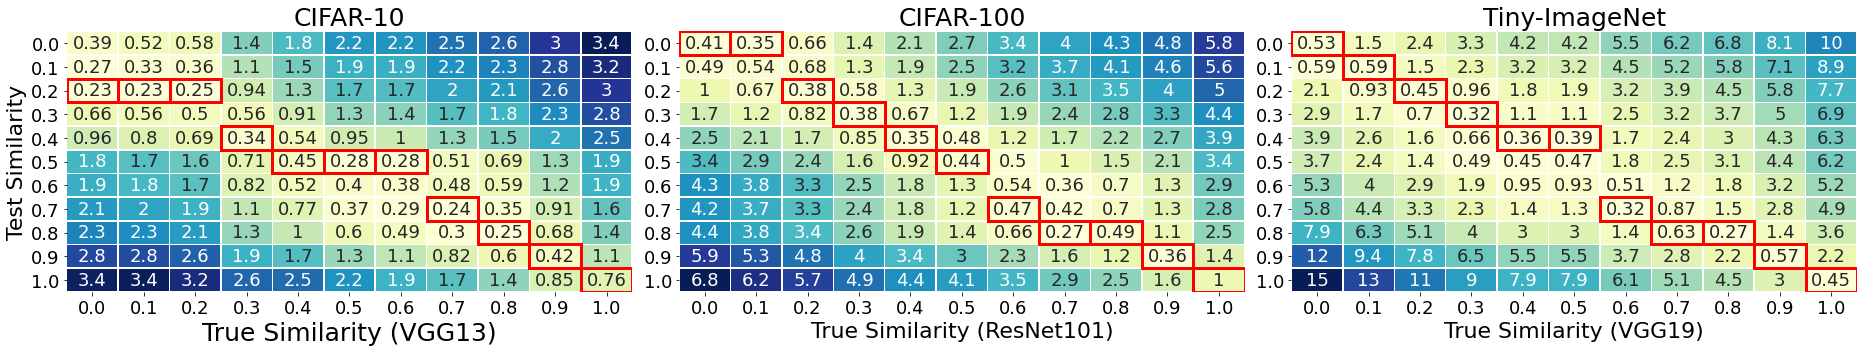

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(26, 5)

# cbar_ax = fig.add_axes([1, .1, .01, .83])
sns.heatmap(heat_matrix_cifar10, #vmin=0, vmax=1, 
            cmap="YlGnBu", annot=True, ax=ax1, 
            fmt='.2g', linewidths=.5, 
            annot_kws={"fontsize":18}, cbar=False)#, cbar=False, cbar_ax=None)
ax1.set_xlabel("True Similarity (VGG13)", fontsize=25)
ax1.set_xticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=18)
ax1.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
                    , fontsize=18, rotation=0)
ax1.set_ylabel("Test Similarity", fontsize=22)
ax1.set_title("CIFAR-10", fontsize=25)
# use matplotlib.colorbar.Colorbar object
# cbar = ax1.collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)
# cbar = ax1.collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)
ax1.add_patch(Rectangle((10,10),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((9,9),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((8,8),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((7,7),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((6,5),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((5,5),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((4,5),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((3,4),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((2,2),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((1,2),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((0,2),1,1, fill=False, edgecolor='red', lw=3))

sns.heatmap(heat_matrix_cifar100, #vmin=0, vmax=1, 
            cmap="YlGnBu", annot=True, ax=ax2, 
            fmt='.2g', linewidths=.5, 
            annot_kws={"fontsize":18}, cbar=False)#, cbar=False, cbar_ax=None)
ax2.set_xlabel("True Similarity (ResNet101)", fontsize=22)
ax2.set_xticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=18)
ax2.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                    fontsize=18, rotation=0)
# ax2.set_ylabel("Test Similarity", fontsize=20)
ax2.set_title("CIFAR-100", fontsize=25)
# use matplotlib.colorbar.Colorbar object
# cbar = ax2.collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)
# cbar = ax2.collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)
ax2.add_patch(Rectangle((10,10),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((9,9),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((8,8),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((7,8),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((6,7),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((5,5),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((4,4),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((3,3),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((2,2),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((1,0),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((0,0),1,1, fill=False, edgecolor='red', lw=3))



sns.heatmap(heat_matrix_tinyimagenet, #vmin=0, vmax=1, 
            cmap="YlGnBu", annot=True, ax=ax3, 
            fmt='.2g', linewidths=.5, 
            annot_kws={"fontsize":18}, cbar=False)#, cbar_ax=cbar_ax)
ax3.set_xlabel("True Similarity (VGG19)", fontsize=22)
ax3.set_xticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=18)
ax3.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                    fontsize=18, rotation=0)

# ax3.set_ylabel("Test Similarity", fontsize=20)
ax3.set_title("Tiny-ImageNet", fontsize=25)
# use matplotlib.colorbar.Colorbar object
# cbar = ax3.collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)


ax3.add_patch(Rectangle((10,10),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((9,9),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((8,8),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((7,8),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((6,7),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((5,4),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((4,4),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((3,3),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((2,2),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((1,1),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((0,0),1,1, fill=False, edgecolor='red', lw=3))


plt.tight_layout()
plt.savefig('figures/model_distance_stats_heatmap.pdf', bbox_inches='tight')
plt.show()

# Topk confidence score

In [35]:
from utils import leave_topk
lk = 

In [36]:
cifar10_archi1_pred = pickle.load(open("../results/model_distance/cifar10_predict_resnet18_0.0.pkl", "rb"))
cifar10_archi2_pred = pickle.load(open("../results/model_distance/cifar10_predict_vgg13_0.0.pkl", "rb"))

In [37]:
inters = sorted(list(cifar10_archi1_pred.keys()))[:-1]
vic_mean9 = leave_topk(cifar10_archi1_pred['vic'].mean(dim=0), lk)
heat_matrix_cifar10 = np.zeros((11, 11))
for i, inter_target in enumerate(inters):
    print("-"*90)

    int_mean9 = cifar10_archi1_pred[inter_target]
    for a in range(len(int_mean9)):
        int_mean9[a] = leave_topk(int_mean9[a], lk)

    dist_mean9 = torch.sum((int_mean9 - vic_mean9.unsqueeze(0).expand(
            10, vic_mean9.shape[0], vic_mean9.shape[1]))**2, dim=2).mean(dim=0).cpu().numpy()[0:100]                            
    
    for j, inter_test in enumerate(inters):
        
        stats_list= []
        for k in range(10):
            
            int_test = leave_topk(cifar10_archi2_pred[inter_test][-k], lk)
            dist_test = torch.sum((int_test[:, :10] - vic_mean9[:, :10])**2, dim=1).cpu().numpy()[:100]
            stats, pv = sps.ttest_ind(dist_mean9, dist_test)
            stats_list.append(np.abs(stats))
            stats_dict['cifar10'][k][j][i] = np.abs(stats)
            
        
        stats = np.mean(stats_list)
        print(inter_target, inter_test, stats, pv)
        heat_matrix_cifar10[j][i] = stats

------------------------------------------------------------------------------------------
int0.0 int0.0 0.4608385550300252 0.7330254711803856
int0.0 int0.1 0.28200682801637705 0.9307804934348873
int0.0 int0.2 0.2780156204700312 0.9577552844671616
int0.0 int0.3 0.6875476520638248 0.44042027026878583
int0.0 int0.4 0.9457471644239362 0.4274499354502338
int0.0 int0.5 1.8300189801976512 0.15624459028319634
int0.0 int0.6 1.9206473765976295 0.029441488433246545
int0.0 int0.7 2.177899070207549 0.03421521221863252
int0.0 int0.8 2.3403598149090645 0.014567572347333059
int0.0 int0.9 2.811751130825999 0.001647281223292052
int0.0 int1.0 3.4281943452566446 0.0005108547589840956
------------------------------------------------------------------------------------------
int0.1 int0.0 0.5868452486518632 0.5867307480126627
int0.1 int0.1 0.3065553073930046 0.9169862644877346
int0.1 int0.2 0.2859995280786351 0.8003823785414405
int0.1 int0.3 0.5820644695787065 0.5592382864793263
int0.1 int0.4 0.77068192872

In [38]:
cifar100_archi1_pred = pickle.load(open("../results/model_distance/cifar100_predict_resnet34_0.0.pkl", "rb"))
cifar100_archi2_pred = pickle.load(open("../results/model_distance/cifar100_predict_resnet101_0.0.pkl", "rb"))

In [41]:
inters = sorted(list(cifar100_archi1_pred.keys()))[:-1]
vic_mean9 = leave_topk(cifar100_archi1_pred['vic'].mean(dim=0), lk)
heat_matrix_cifar100 = np.zeros((11, 11))
for i, inter_target in enumerate(inters):
    print("-"*90)
    int_mean9 = cifar100_archi1_pred[inter_target]
    for a in range(len(int_mean9)):
        int_mean9[a] = leave_topk(int_mean9[a], lk)
    dist_mean9 = torch.sum((int_mean9 - vic_mean9.unsqueeze(0).expand(
            10, vic_mean9.shape[0], vic_mean9.shape[1]))**2, dim=2).mean(dim=0).cpu().numpy()[0:100]
    for j, inter_test in enumerate(inters):
        
        
        stats_list= []
        for k in range(10):
            int_test = leave_topk(cifar100_archi2_pred[inter_test][-k], lk)
            dist_test = torch.sum((int_test - vic_mean9)**2, dim=1).cpu().numpy()[:100]
            
            stats, pv = sps.ttest_ind(dist_mean9, dist_test)
            stats_list.append(np.abs(stats))
            stats_dict['cifar100'][k][j][i] = np.abs(stats)
            
        
        stats = np.mean(stats_list)
        print(inter_target, inter_test, stats, pv)
        heat_matrix_cifar100[j][i] = stats

------------------------------------------------------------------------------------------
int0.0 int0.0 0.3482662287977628 0.6147615841446522
int0.0 int0.1 0.4921511820657402 0.7471646327500033
int0.0 int0.2 0.9753557461445794 0.993129317434712
int0.0 int0.3 1.7001822371648618 0.29056827287203596
int0.0 int0.4 2.548517916576155 0.018274265940616652
int0.0 int0.5 3.3726314859090687 0.013167608699624302
int0.0 int0.6 4.365558916964213 0.00018353696381807232
int0.0 int0.7 4.296546236217976 2.7019589825955165e-06
int0.0 int0.8 4.325120334311405 4.814147686326436e-05
int0.0 int0.9 5.916625646448745 1.9327643055308282e-08
int0.0 int1.0 6.866325903094404 8.298700032111174e-11
------------------------------------------------------------------------------------------
int0.1 int0.0 0.38314769771014073 0.3903421749670678
int0.1 int0.1 0.5320790418708612 0.5140451814714484
int0.1 int0.2 0.6845455541947943 0.723051298879722
int0.1 int0.3 1.3328205070520638 0.48163555964149796
int0.1 int0.4 2.16264

In [42]:
tinyimagenet_archi1_pred = pickle.load(open("../results/model_distance/tinyimagenet_predict_resnet152_0.0.pkl", "rb"))
tinyimagenet_archi2_pred = pickle.load(open("../results/model_distance/tinyimagenet_predict_vgg19_0.0.pkl", "rb"))

In [43]:
inters = sorted(list(tinyimagenet_archi1_pred.keys()))[:-1]
vic_mean9 = leave_topk(tinyimagenet_archi1_pred['vic'].mean(dim=0), lk)
heat_matrix_tinyimagenet = np.zeros((11, 11))
for i, inter_target in enumerate(inters):
    print("-"*90)
    int_mean9 = tinyimagenet_archi1_pred[inter_target]
    for a in range(len(int_mean9)):
        int_mean9[a] = leave_topk(int_mean9[a], lk)
    dist_mean9 = torch.sum((int_mean9 - vic_mean9.unsqueeze(0).expand(
            10, vic_mean9.shape[0], vic_mean9.shape[1]))**2, dim=2).mean(dim=0).cpu().numpy()[0:100]
    for j, inter_test in enumerate(inters):

        
        stats_list= []
        for k in range(10):
            int_test = leave_topk(tinyimagenet_archi2_pred[inter_test][-k], lk)
            dist_test = torch.sum((int_test - vic_mean9)**2, dim=1).cpu().numpy()[0:100]
            
            stats, pv = sps.ttest_ind(dist_mean9, dist_test)
            stats_list.append(np.abs(stats))
            stats_dict['tinyimagenet'][k][j][i] = np.abs(stats)
            
        
        stats = np.mean(stats_list)
        print(inter_target, inter_test, stats, pv)
        heat_matrix_tinyimagenet[j][i] = stats

------------------------------------------------------------------------------------------
int0.0 int0.0 0.3892818968713753 0.9336024008848288
int0.0 int0.1 0.711759698040771 0.8020723834171667
int0.0 int0.2 2.190496912986281 0.014809255456142244
int0.0 int0.3 3.006891142944446 0.003705454206846059
int0.0 int0.4 4.066164757215794 1.707719474551236e-07
int0.0 int0.5 3.8131983887074283 0.00029437409761414444
int0.0 int0.6 5.533281378082063 1.5605336223143105e-09
int0.0 int0.7 6.075787375280018 2.013163235233769e-09
int0.0 int0.8 8.240067999140626 2.544075486799186e-18
int0.0 int0.9 11.912976085612069 2.2256230304767073e-25
int0.0 int1.0 15.858148677987728 4.255144350827793e-37
------------------------------------------------------------------------------------------
int0.1 int0.0 1.4790003101532012 0.21613826618975313
int0.1 int0.1 0.5105720618447371 0.16803770681801136
int0.1 int0.2 0.9648164870126926 0.2234883902015762
int0.1 int0.3 1.7180630117768338 0.10143809816403015
int0.1 int0.4 

# Plot Heatmap

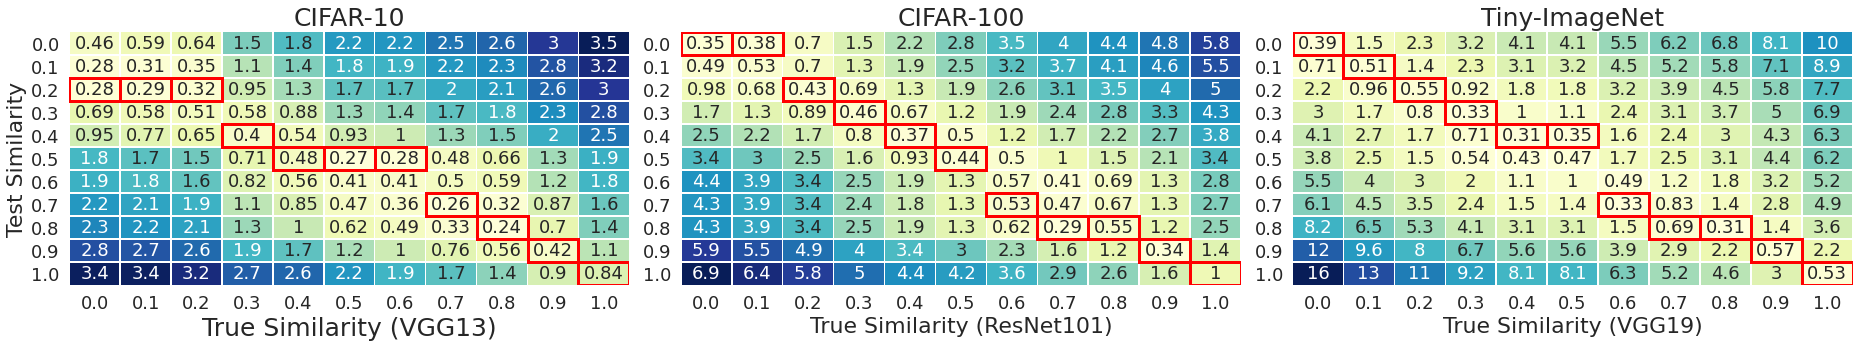

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(26, 5)

# cbar_ax = fig.add_axes([1, .1, .01, .83])
sns.heatmap(heat_matrix_cifar10, #vmin=0, vmax=1, 
            cmap="YlGnBu", annot=True, ax=ax1, 
            fmt='.2g', linewidths=.5, 
            annot_kws={"fontsize":18}, cbar=False)#, cbar=False, cbar_ax=None)
ax1.set_xlabel("True Similarity (VGG13)", fontsize=25)
ax1.set_xticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=18)
ax1.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
                    , fontsize=18, rotation=0)
ax1.set_ylabel("Test Similarity", fontsize=22)
ax1.set_title("CIFAR-10", fontsize=25)
# use matplotlib.colorbar.Colorbar object
# cbar = ax1.collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)
# cbar = ax1.collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)
ax1.add_patch(Rectangle((10,10),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((9,9),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((8,8),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((7,7),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((6,5),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((5,5),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((4,5),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((3,4),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((2,2),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((1,2),1,1, fill=False, edgecolor='red', lw=3))
ax1.add_patch(Rectangle((0,2),1,1, fill=False, edgecolor='red', lw=3))

sns.heatmap(heat_matrix_cifar100, #vmin=0, vmax=1, 
            cmap="YlGnBu", annot=True, ax=ax2, 
            fmt='.2g', linewidths=.5, 
            annot_kws={"fontsize":18}, cbar=False)#, cbar=False, cbar_ax=None)
ax2.set_xlabel("True Similarity (ResNet101)", fontsize=22)
ax2.set_xticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=18)
ax2.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                    fontsize=18, rotation=0)
# ax2.set_ylabel("Test Similarity", fontsize=20)
ax2.set_title("CIFAR-100", fontsize=25)
# use matplotlib.colorbar.Colorbar object
# cbar = ax2.collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)
# cbar = ax2.collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)
ax2.add_patch(Rectangle((10,10),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((9,9),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((8,8),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((7,8),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((6,7),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((5,5),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((4,4),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((3,3),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((2,2),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((1,0),1,1, fill=False, edgecolor='red', lw=3))
ax2.add_patch(Rectangle((0,0),1,1, fill=False, edgecolor='red', lw=3))



sns.heatmap(heat_matrix_tinyimagenet, #vmin=0, vmax=1, 
            cmap="YlGnBu", annot=True, ax=ax3, 
            fmt='.2g', linewidths=.5, 
            annot_kws={"fontsize":18}, cbar=False)#, cbar_ax=cbar_ax)
ax3.set_xlabel("True Similarity (VGG19)", fontsize=22)
ax3.set_xticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], fontsize=18)
ax3.set_yticklabels(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'], 
                    fontsize=18, rotation=0)

# ax3.set_ylabel("Test Similarity", fontsize=20)
ax3.set_title("Tiny-ImageNet", fontsize=25)
# use matplotlib.colorbar.Colorbar object
# cbar = ax3.collections[0].colorbar
# cbar.ax.tick_params(labelsize=18)


ax3.add_patch(Rectangle((10,10),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((9,9),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((8,8),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((7,8),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((6,7),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((5,4),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((4,4),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((3,3),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((2,2),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((1,1),1,1, fill=False, edgecolor='red', lw=3))
ax3.add_patch(Rectangle((0,0),1,1, fill=False, edgecolor='red', lw=3))


plt.tight_layout()
plt.savefig('figures/model_distance_stats_heatmap_top{}.pdf'.format(lk), bbox_inches='tight')
plt.show()

# approximate estimation accuracy curve  

In [56]:
dfdict = {'ModelID':[], 'Mu':[], 'Eps':[], 'Dataset':[]}
for dataset in ['CIFAR-10', 'CIFAR-100', 'Tiny-ImageNet']:
    
    for k in range(10):
        dist = np.abs(stats_dict[dataset.lower().replace("-", "")][k].argmin(axis=0) - np.arange(0, 11))

        for m in range(1, 5):
            dfdict['Mu'].append(m/10)
            dfdict['Eps'].append((dist>=m).astype(np.int32).mean())
            dfdict['ModelID'].append(k)
            dfdict['Dataset'].append(dataset)

In [57]:
df = pd.DataFrame.from_dict(dfdict)

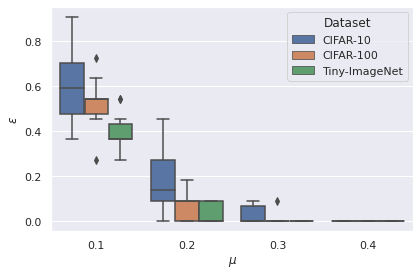

In [58]:

fig.set_size_inches(5, 4)
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x='Mu', y='Eps', data=df, hue='Dataset')
ax.set_ylabel("$\epsilon$")
ax.set_xlabel("$\mu$")

plt.tight_layout()
plt.savefig('figures/approximate_estimation_accuracy.pdf', bbox_inches='tight')
plt.show()

### PREVIOUS VERSION

In [18]:
cifar10_dfdict = {'ModelID':[], 'Mu':[], 'Eps':[]}
for k in range(10):
    dist = np.abs(stats_dict['cifar10'][k].argmin(axis=0) - np.arange(0, 11))
    
    for m in range(1, 5):
        cifar10_dfdict['Mu'].append(m/10)
        cifar10_dfdict['Eps'].append((dist>=m).astype(np.int32).mean())
        cifar10_dfdict['ModelID'].append(k)


In [19]:
cifar100_dfdict = {'ModelID':[], 'Mu':[], 'Eps':[]}
for k in range(10):
    dist = np.abs(stats_dict['cifar100'][k].argmin(axis=0) - np.arange(0, 11))
    for m in range(1, 5):
        cifar100_dfdict['Mu'].append(m/10)
        cifar100_dfdict['Eps'].append((dist>=m).astype(np.int32).mean())
        cifar100_dfdict['ModelID'].append(k)

[1 1 0 1 1 0 0 1 1 0 0]
[1 1 0 1 1 1 1 0 0 0 0]
[1 0 0 0 1 1 1 1 2 0 0]
[0 1 2 1 0 1 1 1 1 3 0]
[0 1 1 2 0 1 1 1 0 0 0]
[1 1 2 1 0 2 1 1 0 0 0]
[1 1 1 1 0 0 1 0 0 0 0]
[0 1 0 0 0 0 1 0 1 0 0]
[1 0 0 0 0 1 1 1 2 0 0]
[2 1 1 1 1 0 0 0 1 0 0]


In [20]:
tinyimagenet_dfdict = {'ModelID':[], 'Mu':[], 'Eps':[]}
for k in range(10):
    dist = np.abs(stats_dict['tinyimagenet'][k].argmin(axis=0) - np.arange(0, 11))
    for m in range(1, 5):
        tinyimagenet_dfdict['Mu'].append(m/10)
        tinyimagenet_dfdict['Eps'].append((dist>=m).astype(np.int32).mean())
        tinyimagenet_dfdict['ModelID'].append(k)

In [21]:
cifar10_df = pd.DataFrame.from_dict(cifar10_dfdict)
cifar100_df = pd.DataFrame.from_dict(cifar100_dfdict)
tinyimagenet_df = pd.DataFrame.from_dict(tinyimagenet_dfdict)

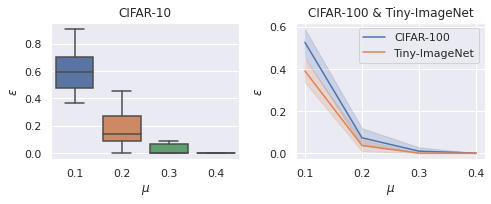

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(7, 3)
sns.set_theme(style="darkgrid")
sns.boxplot(x='Mu', y='Eps', data=cifar10_df, ax=ax1)
ax1.set_ylabel("$\epsilon$")
ax1.set_xlabel("$\mu$")
ax1.set_title("CIFAR-10")
sns.lineplot(x='Mu', y='Eps', data=cifar100_df, label='CIFAR-100', ax=ax2)
sns.lineplot(x='Mu', y='Eps', data=tinyimagenet_df, label='Tiny-ImageNet', ax=ax2)
ax2.set_ylabel("$\epsilon$")
ax2.set_xlabel("$\mu$")
ax2.set_title("CIFAR-100 & Tiny-ImageNet")
plt.tight_layout()
plt.savefig('figures/approximate_estimation_accuracy.pdf', bbox_inches='tight')
plt.show()

# Influcence of architecture on estimation accuracy 

In [45]:
topk=5

In [57]:
def get_stat_heatmap(archi1_pred, archi2_pred, nc=None, topk=None):
    inters = sorted(list(archi1_pred.keys()))[:-1]
    vic_mean9 = archi1_pred['vic'].mean(dim=0)
    print(vic_mean9[0])
    if topk is not None:
        vic_mean9 = leave_topk(vic_mean9, k=topk)
    print(vic_mean9[0])
    heat_matrix = [np.zeros((11, 11)) for _ in range(10)]
    for i, inter_target in enumerate(inters):
        int_mean9 = archi1_pred[inter_target]
        if topk is not None:
            for a in range(len(int_mean9)):
                int_mean9[a] = leave_topk(int_mean9[a], k=topk)
        dist_mean9 = torch.sum((int_mean9 - vic_mean9.unsqueeze(0).expand(
                10, vic_mean9.shape[0], vic_mean9.shape[1]))**2, dim=2).mean(dim=0).cpu().numpy()[0:100]
        for j, inter_test in enumerate(inters):
            for k in range(10):
                int_test = archi2_pred[inter_test][-k]
                if nc is not None:
                    int_test = archi2_pred[inter_test][-k][:, :nc]
                if topk is not None:
                    int_test = leave_topk(int_test, k=topk)
                dist_test = torch.sum((int_test - vic_mean9)**2, dim=1).cpu().numpy()[0:100]
                stats, pv = sps.ttest_ind(dist_mean9, dist_test)
                heat_matrix[k][j][i] = np.abs(stats)
    return heat_matrix

In [58]:
cifar10_resnet18_pred = pickle.load(open("../results/model_distance/cifar10_predict_resnet18_0.0.pkl", "rb"))
cifar100_resnet34_pred = pickle.load(open("../results/model_distance/cifar100_predict_resnet34_0.0.pkl", "rb"))
tinyimagenet_resnet152_pred = pickle.load(
    open("../results/model_distance/tinyimagenet_predict_resnet152_0.0.pkl", "rb"))


In [59]:
heatmap_dict = {'CIFAR-10':{}, 'CIFAR-100':{}, 'Tiny-ImageNet':{}}
for archi in ['VGG13', 'ResNet18', 'ResNet34', 'ResNet50']:
    archi_pred = pickle.load(
        open("../results/model_distance/cifar10_predict_{}_0.0.pkl".format(archi.lower()), "rb"))
    heatmap_dict['CIFAR-10'][archi] = get_stat_heatmap(cifar10_resnet18_pred, archi_pred, nc=10, topk=topk)
for archi in ['VGG16', 'ResNext101', 'ResNet101', 'ResNet34']:
    archi_pred = pickle.load(
        open("../results/model_distance/cifar100_predict_{}_0.0.pkl".format(archi.lower()), "rb"))
    heatmap_dict['CIFAR-100'][archi] = get_stat_heatmap(cifar100_resnet34_pred, archi_pred, topk=topk)
for archi in ['DenseNet121', 'WideResNet101', 'VGG19', 'ResNet152']:
    archi_pred = pickle.load(
        open("../results/model_distance/tinyimagenet_predict_{}_0.0.pkl".format(archi.lower()), "rb"))
    heatmap_dict['Tiny-ImageNet'][archi] = get_stat_heatmap(tinyimagenet_resnet152_pred, archi_pred, topk=topk)

tensor([9.9998e-01, 5.9657e-07, 8.8902e-06, 1.0222e-06, 2.1314e-06, 1.3447e-07,
        2.0156e-06, 7.7872e-08, 1.2485e-06, 5.6531e-07])
tensor([9.9998e-01, 1.8544e-06, 1.8544e-06, 1.8544e-06, 1.8544e-06, 1.8544e-06,
        1.8544e-06, 1.8544e-06, 1.8544e-06, 1.8544e-06])
tensor([9.9998e-01, 5.9657e-07, 8.8902e-06, 1.0222e-06, 2.1314e-06, 1.3447e-07,
        2.0156e-06, 7.7872e-08, 1.2485e-06, 5.6531e-07])
tensor([9.9998e-01, 1.8544e-06, 1.8544e-06, 1.8544e-06, 1.8544e-06, 1.8544e-06,
        1.8544e-06, 1.8544e-06, 1.8544e-06, 1.8544e-06])
tensor([9.9998e-01, 5.9657e-07, 8.8902e-06, 1.0222e-06, 2.1314e-06, 1.3447e-07,
        2.0156e-06, 7.7872e-08, 1.2485e-06, 5.6531e-07])
tensor([9.9998e-01, 1.8544e-06, 1.8544e-06, 1.8544e-06, 1.8544e-06, 1.8544e-06,
        1.8544e-06, 1.8544e-06, 1.8544e-06, 1.8544e-06])
tensor([9.9998e-01, 5.9657e-07, 8.8902e-06, 1.0222e-06, 2.1314e-06, 1.3447e-07,
        2.0156e-06, 7.7872e-08, 1.2485e-06, 5.6531e-07])
tensor([9.9998e-01, 1.8544e-06, 1.8544e-0

In [49]:
cifar10_dfdict = {'ModelID':[], 'Mu':[], 'Eps':[], 'Architecture':[]}

for archi, heatmap in heatmap_dict['CIFAR-10'].items():
    
    for k in range(10):
        dist = np.abs(heatmap[k].argmin(axis=0) - np.arange(0, 11))
        for m in range(10, 50, 5):
            cifar10_dfdict['Mu'].append(m/100)
            cifar10_dfdict['Eps'].append((dist>=(m/10)).astype(np.int32).mean())
            cifar10_dfdict['ModelID'].append(k)
            cifar10_dfdict['Architecture'].append(archi)

In [50]:
cifar100_dfdict = {'ModelID':[], 'Mu':[], 'Eps':[], 'Architecture':[]}

for archi, heatmap in heatmap_dict['CIFAR-100'].items():
    
    for k in range(10):
        dist = np.abs(heatmap[k].argmin(axis=0) - np.arange(0, 11))
        for m in range(10, 50, 5):
            cifar100_dfdict['Mu'].append(m/100)
            cifar100_dfdict['Eps'].append((dist>=(m/10)).astype(np.int32).mean())
            cifar100_dfdict['ModelID'].append(k)
            cifar100_dfdict['Architecture'].append(archi)

In [51]:

tinyimagenet_dfdict = {'ModelID':[], 'Mu':[], 'Eps':[], 'Architecture':[]}
for archi, heatmap in heatmap_dict['Tiny-ImageNet'].items():
    for k in range(10):
        dist = np.abs(heatmap[k].argmin(axis=0) - np.arange(0, 11))

        for m in range(10, 50, 5):
            tinyimagenet_dfdict['Mu'].append(m/100)
            tinyimagenet_dfdict['Eps'].append((dist>=(m/10)).astype(np.int32).mean())
            tinyimagenet_dfdict['ModelID'].append(k)
            tinyimagenet_dfdict['Architecture'].append(archi)

In [52]:
cifar10_df = pd.DataFrame.from_dict(cifar10_dfdict)
cifar100_df = pd.DataFrame.from_dict(cifar100_dfdict)
tinyimagenet_df = pd.DataFrame.from_dict(tinyimagenet_dfdict)

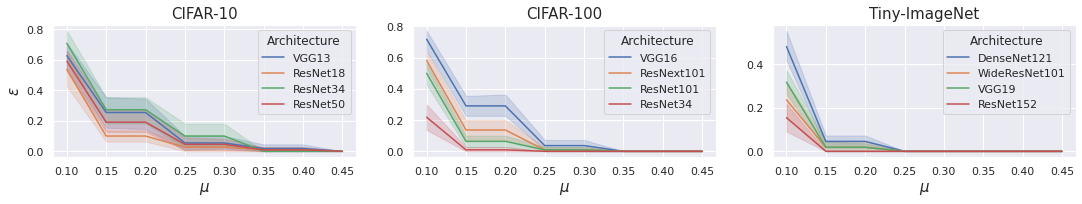

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15.2, 3)
sns.set_theme(style="darkgrid")
sns.lineplot(x='Mu', y='Eps', data=cifar10_df, hue='Architecture', ax=ax1)
ax1.set_ylabel("$\epsilon$", fontsize=15)
ax1.set_xlabel("$\mu$", fontsize=15)
ax1.set_title("CIFAR-10", fontsize=15)

sns.lineplot(x='Mu', y='Eps', data=cifar100_df, hue='Architecture', ax=ax2)
ax2.set_ylabel("  ")
ax2.set_xlabel("$\mu$", fontsize=15)
ax2.set_title("CIFAR-100", fontsize=15)

sns.lineplot(x='Mu', y='Eps', data=tinyimagenet_df, hue='Architecture', ax=ax3)
ax3.set_ylabel("  ")
ax3.set_xlabel("$\mu$", fontsize=15)
ax3.set_title("Tiny-ImageNet", fontsize=15)
plt.tight_layout()
plt.savefig('figures/estimation_accuracy_architecture_top{}.pdf'.format(topk), bbox_inches='tight')
plt.show()

# Model distance lineplot

In [123]:
dataset_archi_dict = {
    'CIFAR-10': ['ResNet18', 'ResNet34', 'ResNet50', 'VGG13'],
    'CIFAR-100': ['ResNet34', 'ResNet101', 'VGG16', 'Resnext101'],
    'Tiny ImageNet': ['ResNet152', 'DenseNet121', 'VGG19', 'WideResNet101']
}
dataset_vic_dict = {
    'CIFAR-10': 'ResNet18',
    'CIFAR-100': 'ResNet34',
    'Tiny ImageNet': 'ResNet152'
}
pred_dict = {}
for dataset_name, archi_list in dataset_archi_dict.items():
    archi_dict = {}
    for archi in archi_list:
        archi_dict[archi] = pickle.load(open("../results/model_distance/{}_predict_{}_0.0.pkl".format(
            dataset_name.lower().replace(" ", "").replace("-", ""), archi.lower()), "rb"))
    pred_dict[dataset_name] = archi_dict

In [124]:
# fix cifar10 ResNet50 bug
for x in (np.arange(11)/10):
    pred_dict['CIFAR-10']['ResNet50']['int{}'.format(x)] = pred_dict['CIFAR-10']['ResNet50']['int{}'.format(x)][:, :, :10]

pred_dict['CIFAR-10']['ResNet50']['int0.0'].shape

torch.Size([10, 100, 10])

In [125]:
df_dict = {}
for dataset_name, archi_list in dataset_archi_dict.items():
    vic_archi = dataset_vic_dict[dataset_name]
    vic_pred_raw = pred_dict[dataset_name][vic_archi]['vic']
    vic_pred_mean = vic_pred_raw.mean(dim=0)
    df_dataset = {'s':[], 'Architecture':[], 'Model Distance':[]}#, 'Group':[]}
    for archi in archi_list:
        for s in (np.arange(11)/10)[::-1]:
            
            archi_s_pred_raw = pred_dict[dataset_name][archi]['int{}'.format(s)]

            
            diff = torch.sum((archi_s_pred_raw - vic_pred_mean.unsqueeze(0).expand(
                10, vic_pred_mean.shape[0], vic_pred_mean.shape[1]))**2, dim=2).mean(dim=0)

            df_dataset['s'].extend([s]*len(diff))
            df_dataset['Architecture'].extend([archi]*len(diff))
            df_dataset['Model Distance'].extend(diff.reshape(-1).tolist())


    df_dict[dataset_name] = pd.DataFrame.from_dict(df_dataset)

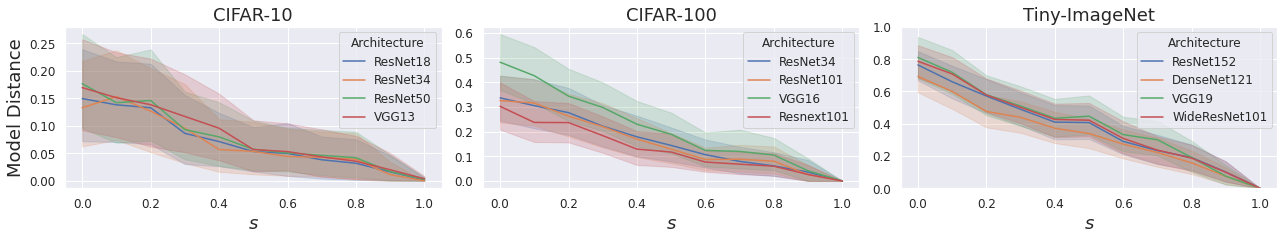

In [150]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18, 3.5)


sns.set_theme(style="darkgrid")
sns.lineplot(x='s', y='Model Distance', hue='Architecture', sort=False,#style='Group', 
             data=df_dict['CIFAR-10'], ax=ax1)
ax1.set_title("CIFAR-10", fontsize=18)
ax1.set_xlabel("$s$", fontsize=18)
ax1.set_ylabel('Model Distance', fontsize=18)
plt.setp(ax1.get_yticklabels(), fontsize='12')
plt.setp(ax1.get_xticklabels(), fontsize='12')
plt.setp(ax1.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='12')

sns.lineplot(x='s', y='Model Distance', hue='Architecture', sort=False, #style='Group', 
         data=df_dict['CIFAR-100'], ax=ax2)
ax2.set_title("CIFAR-100", fontsize=18)
ax2.set_xlabel("$s$", fontsize=18)
ax2.set_ylabel("")
plt.setp(ax2.get_yticklabels(), fontsize='12')
plt.setp(ax2.get_xticklabels(), fontsize='12')
plt.setp(ax2.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='12')

sns.lineplot(x='s', y='Model Distance', hue='Architecture', sort=False, #style='Group', #markers=True, dashes=False,
             data=df_dict['Tiny ImageNet'], ax=ax3)
ax3.set_title("Tiny-ImageNet", fontsize=18)
ax3.set_xlabel("$s$", fontsize=18)
ax3.set_ylabel("")
ax3.set_ylim(0, 1.0)
plt.setp(ax3.get_yticklabels(), fontsize='12')
plt.setp(ax3.get_xticklabels(), fontsize='12')
plt.setp(ax3.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax3.get_legend().get_title(), fontsize='12')

plt.tight_layout()
plt.savefig('figures/model_distance_lineplot.pdf', bbox_inches='tight')
plt.show()

# Violin plot for motivation section

In [560]:
select_ints = [0.1, 0.3, 0.5, 0.7, 0.9]

select_archis =  ['ResNet152', 'VGG19']

violin_df_dict = {'Architecture': [], 'Confidence': [], 's': [],}
for archi in select_archis:
    
    for s in select_ints:
        int_pred_raw = pred_dict['Tiny ImageNet'][archi]['int{}'.format(s)]
        int_pred_mean = int_pred_raw.mean(dim=0)
        conf = torch.max(int_pred_mean, dim=1)[0]
        violin_df_dict['Architecture'].extend([archi] * len(conf))
        violin_df_dict['Confidence'].extend(conf.reshape(-1).tolist())
        violin_df_dict['s'].extend([s] * len(conf))
violin_df = pd.DataFrame.from_dict(violin_df_dict)

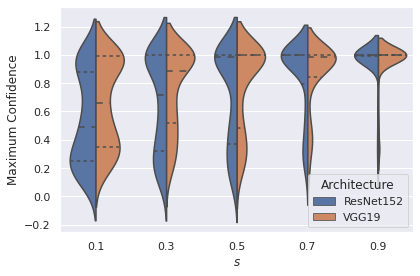

In [44]:

sns.set_theme(style="darkgrid")
ax = sns.violinplot(x="s", y="Confidence", hue="Architecture",
                    data=violin_df, split=True, inner="quartile")
ax.set_xlabel("$s$")
ax.set_ylabel("Maximum Confidence")

plt.tight_layout()
plt.savefig('figures/violinplot_max_confidence.pdf', bbox_inches='tight')
plt.show()

In [136]:
a = pickle.load(open("../results/accuracy/tinyimagenet_acc.pkl", "rb"))

In [138]:
a['mobilenet_v2']

{'vic': [(0.4207000136375427, 0.6866000294685364),
  (0.4221999943256378, 0.6880000233650208),
  (0.42340001463890076, 0.6926000118255615),
  (0.4269999861717224, 0.6966999769210815),
  (0.421999990940094, 0.6951000094413757),
  (0.42489999532699585, 0.6901999711990356),
  (0.42730000615119934, 0.6913999915122986),
  (0.42329999804496765, 0.690500020980835),
  (0.42289999127388, 0.6945000290870667),
  (0.4244000017642975, 0.6940000057220459)],
 'int0.9': [(0.42250001430511475, 0.6917999982833862),
  (0.4293999969959259, 0.6933000087738037),
  (0.4196999967098236, 0.6851999759674072),
  (0.4262999892234802, 0.6955999732017517),
  (0.42640000581741333, 0.692799985408783),
  (0.42329999804496765, 0.6899999976158142),
  (0.42329999804496765, 0.6858999729156494),
  (0.42480000853538513, 0.6869999766349792),
  (0.4251999855041504, 0.6930000185966492),
  (0.42649999260902405, 0.6973000168800354)],
 'int0.3': [(0.4180000126361847, 0.6879000067710876),
  (0.42500001192092896, 0.6880000233650208

# Accuracy

In [3]:
tiny_acc = pickle.load(open("../results/accuracy/cifar100_acc.pkl", "rb"))

top1_accs = []
top5_accs = []
for top1acc, top5acc in tiny_acc['resnext101']['vic']:
    top1_accs.append(top1acc)
    top5_accs.append(top5acc)
    

print("${:.2f}\pm {:.2f}$".format(np.mean(top1_accs)*100, np.std(top1_accs)*100))
print("${:.2f}\pm {:.2f}$".format(np.mean(top5_accs)*100, np.std(top5_accs)*100))

$72.15\pm 0.29$
$91.44\pm 0.11$


# ModelHash

In [218]:
import torch
import torch.nn as nn

In [221]:
cifar10_ae = nn.Sequential(nn.Linear(10, 64), nn.ReLU(), nn.Linear(64, 64), nn.ReLU(),
                           nn.Linear(64, 64), nn.ReLU(), nn.Linear(64, 10))
cifar10_ae.load_state_dict(torch.load("../results/hash/cifar10/autoencoder.pt"))
cifar10_ae.eval()
cifar10_outdicts = pickle.load(open("../results/hash/cifar10/rand_outs.pkl", "rb"))
# (train_out, origin_out, quant_out, finetune_out, checkpoint_out, unrelated_out, prune_out2, prune_out4)
cifar100_ae = nn.Sequential(nn.Linear(100, 64), nn.ReLU(), nn.Linear(64, 32), nn.ReLU(), 
                            nn.Linear(32, 64), nn.ReLU(), nn.Linear(64, 100))
cifar100_ae.load_state_dict(torch.load("../results/hash/cifar100/autoencoder.pt"))
cifar100_ae.eval()
cifar100_outdicts = pickle.load(open("../results/hash/cifar100/rand_outs.pkl", "rb"))

tinyimagenet_ae = nn.Sequential(nn.Linear(200, 128), nn.ReLU(), nn.Linear(128, 128), nn.ReLU(), 
                                nn.Linear(128, 64), nn.ReLU(), nn.Linear(64, 128), nn.ReLU(),
                                nn.Linear(128, 128), nn.ReLU(), nn.Linear(128, 200))
tinyimagenet_ae.load_state_dict(torch.load("../results/hash/tinyimagenet/autoencoder.pt"))
tinyimagenet_ae.eval()
tinyimagenet_outdicts = pickle.load(open("../results/hash/tinyimagenet/rand_outs.pkl", "rb"))

In [222]:
print(cifar10_outdicts.keys())

dict_keys(['train', 'origin', 'quant', 'finetune0_dict', 'finetune1_dict', 'finetune2_dict', 'finetune3_dict', 'finetune4_dict', 'advfinetune0_dict', 'advfinetune1_dict', 'advfinetune2_dict', 'advfinetune3_dict', 'advfinetune4_dict', 'unrelated_dict', 'prune2', 'prune4', 'prune6', 'prune8'])


## TSNE

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [217]:
label_dict = {
    5: 'Independent',
    4: 'Quantization',
    3: 'Pruning',
    2: 'Checkpoint',
    1: 'Finetuning',
    0: 'Origin'} 
cifar10_dfdict = {}
cifar100_dfdict = {}
tinyimagenet_dfdict = {}

In [166]:
# cifar10
data_list = []
label_list = []
n = len(cifar10_outdicts['origin'])
data_list.append(cifar10_outdicts['origin'])
label_list.append([label_dict[0]] * n)
data_list.append(cifar10_outdicts['finetune0_dict']['finetune_5_0.pth'])
label_list.append([label_dict[1]] * n)
data_list.append(cifar10_outdicts['checkpoint_dict']['chkp_95.pth'])
label_list.append([label_dict[2]] * n)
data_list.append(cifar10_outdicts['prune2'])
label_list.append([label_dict[3]] * n)
data_list.append(cifar10_outdicts['quant'])
label_list.append([label_dict[4]] * n)
data_list.append(cifar10_outdicts['unrelated_dict']['model_0.pth'])
label_list.append([label_dict[5]] * n)
data_list.append(cifar10_outdicts['unrelated_dict']['model_3.pth'])
label_list.append([label_dict[5]] * n)
data_list.append(cifar10_outdicts['unrelated_dict']['model_6.pth'])
label_list.append([label_dict[5]] * n)

X = torch.cat(data_list).detach().numpy()
print(X.shape)# Visualization t-SNE

y = np.array(label_list).reshape(-1)
tsne = TSNE(n_components=2, init='pca', random_state=0, n_jobs=24)
x = tsne.fit_transform(X)# use t-sne
cifar10_dfdict['Type'] = y
cifar10_dfdict['xaxis'] = (x[:, 0] - np.min(x[:, 0])) / (np.max(x[:, 0]) - np.min(x[:, 0])) * 2 - 1
cifar10_dfdict['yaxis'] = (x[:, 1] - np.min(x[:, 1])) / (np.max(x[:, 1]) - np.min(x[:, 1])) * 2 - 1

(8000, 10)


In [167]:
# cifar100
data_list = []
label_list = []
n = len(cifar100_outdicts['origin'])
data_list.append(cifar100_outdicts['origin'])
label_list.append([label_dict[0]] * n)
data_list.append(cifar100_outdicts['finetune0_dict']['finetune_10_0.pth'])
label_list.append([label_dict[1]] * n)
data_list.append(cifar100_outdicts['checkpoint_dict']['chkp_190.pth'])
label_list.append([label_dict[2]] * n)
data_list.append(cifar100_outdicts['prune2'])
label_list.append([label_dict[3]] * n)
data_list.append(cifar100_outdicts['quant'])
label_list.append([label_dict[4]] * n)
data_list.append(cifar100_outdicts['unrelated_dict']['model_0.pth'])
label_list.append([label_dict[5]] * n)
data_list.append(cifar100_outdicts['unrelated_dict']['model_1.pth'])
label_list.append([label_dict[5]] * n)
data_list.append(cifar100_outdicts['unrelated_dict']['model_2.pth'])
label_list.append([label_dict[5]] * n)

X = torch.cat(data_list).detach().numpy()
print(X.shape)# Visualization t-SNE

y = np.array(label_list).reshape(-1)
tsne = TSNE(n_components=2, init='pca', random_state=0, n_jobs=24)
x = tsne.fit_transform(X)# use t-sne
cifar100_dfdict['Type'] = y
cifar100_dfdict['xaxis'] = (x[:, 0] - np.min(x[:, 0])) / (np.max(x[:, 0]) - np.min(x[:, 0])) * 2 - 1
cifar100_dfdict['yaxis'] = (x[:, 1] - np.min(x[:, 1])) / (np.max(x[:, 1]) - np.min(x[:, 1])) * 2 - 1

(8000, 100)


In [168]:
# tinyimagenet
data_list = []
label_list = []
n = len(tinyimagenet_outdicts['origin'])
data_list.append(tinyimagenet_outdicts['origin'])
label_list.append([label_dict[0]] * n)
data_list.append(tinyimagenet_outdicts['finetune0_dict']['finetune_10_0.pth'])
label_list.append([label_dict[1]] * n)
# data_list.append(tinyimagenet_outdicts['checkpoint_dict']['chkp_190.pth'])
# label_list.append([label_dict[2]] * n)
data_list.append(tinyimagenet_outdicts['prune2'])
label_list.append([label_dict[3]] * n)
data_list.append(tinyimagenet_outdicts['quant'])
label_list.append([label_dict[4]] * n)
data_list.append(tinyimagenet_outdicts['unrelated_dict']['model_0.pth'])
label_list.append([label_dict[5]] * n)
data_list.append(tinyimagenet_outdicts['unrelated_dict']['model_1.pth'])
label_list.append([label_dict[5]] * n)
data_list.append(tinyimagenet_outdicts['unrelated_dict']['model_2.pth'])
label_list.append([label_dict[5]] * n)

X = torch.cat(data_list).detach().numpy()
print(X.shape)# Visualization t-SNE

y = np.array(label_list).reshape(-1)
tsne = TSNE(n_components=2, init='pca', random_state=0, n_jobs=24)
x = tsne.fit_transform(X)# use t-sne
tinyimagenet_dfdict['Type'] = y
tinyimagenet_dfdict['xaxis'] = (x[:, 0] - np.min(x[:, 0])) / (np.max(x[:, 0]) - np.min(x[:, 0])) * 2 - 1
tinyimagenet_dfdict['yaxis'] = (x[:, 1] - np.min(x[:, 1])) / (np.max(x[:, 1]) - np.min(x[:, 1])) * 2 - 1

(16000, 200)


In [169]:
cifar10_df = pd.DataFrame.from_dict(cifar10_dfdict)
cifar100_df = pd.DataFrame.from_dict(cifar100_dfdict)
tinyimagenet_df = pd.DataFrame.from_dict(tinyimagenet_dfdict)

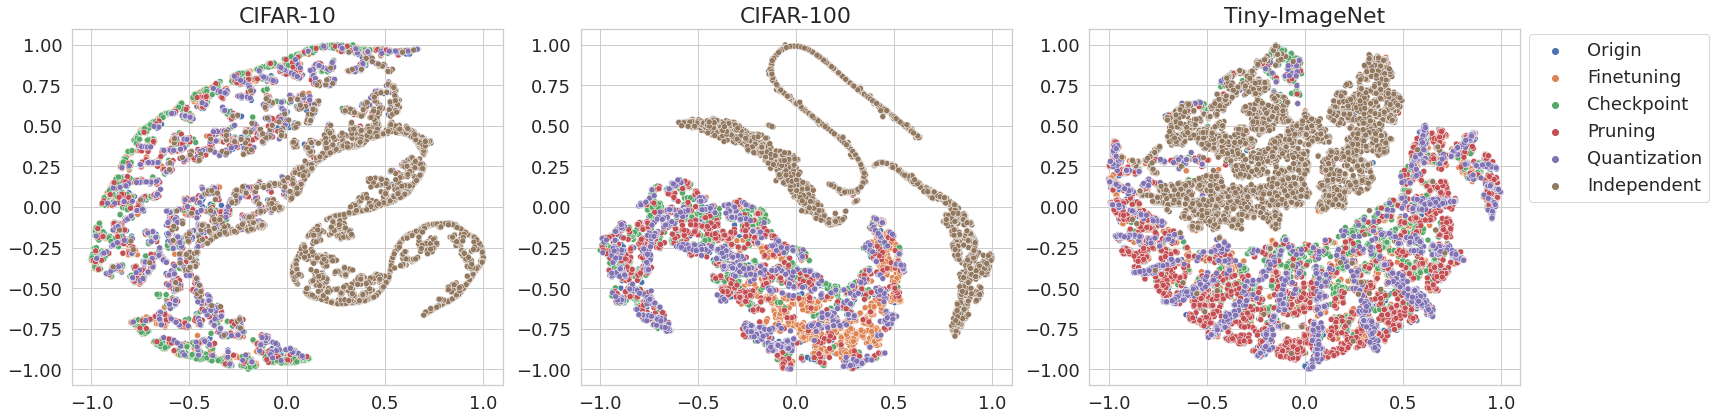

In [194]:
sns.set_theme(style="whitegrid")
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(24, 6)

sns.scatterplot(x='xaxis', y='yaxis', hue='Type', data=cifar10_df, ax=ax1, legend=False)
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_title("CIFAR-10", fontsize=22)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

sns.scatterplot(x='xaxis', y='yaxis', hue='Type', data=cifar100_df, ax=ax2, legend=False)
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_title("CIFAR-100", fontsize=22)

sns.scatterplot(x='xaxis', y='yaxis', hue='Type', data=tinyimagenet_df, ax=ax3)
ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax3.set_title("Tiny-ImageNet", fontsize=22)
# plt.setp(ax3.get_legend().get_texts()) # for legend text

plt.legend(bbox_to_anchor=(1, 0.75), loc='center left', fontsize=18)
plt.tight_layout()
plt.savefig('figures/modelhash_tsne_nochpt.pdf', bbox_inches='tight')
plt.show()

## boxplots

In [223]:
cifar10_dfdict = {'Epoch': [], 'Error':[], 'Type': []}


cifar10_ae.cpu()



Sequential(
  (0): Linear(in_features=10, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
)

In [225]:
n = len(cifar10_outdicts['origin'])
cifar10_origin = cifar10_outdicts['origin']
origin_error = ((cifar10_ae(cifar10_origin).softmax(dim=1) - cifar10_origin)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([0] * n)
cifar10_dfdict['Error'].extend(origin_error.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Finetuned'] * n)

cifar10_ftnp2 = cifar10_outdicts['finetune0_dict']['finetune_2.pth']
ftnp2_error = ((cifar10_ae(cifar10_ftnp2).softmax(dim=1) - cifar10_ftnp2)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([2] * n)
cifar10_dfdict['Error'].extend(ftnp2_error.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Finetuned'] * n)

cifar10_ftnp4 = cifar10_outdicts['finetune0_dict']['finetune_4.pth']
ftnp4_error = ((cifar10_ae(cifar10_ftnp4).softmax(dim=1) - cifar10_ftnp4)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([4] * n)
cifar10_dfdict['Error'].extend(ftnp4_error.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Finetuned'] * n)

cifar10_ftnp6 = cifar10_outdicts['finetune0_dict']['finetune_6.pth']
ftnp6_error = ((cifar10_ae(cifar10_ftnp6).softmax(dim=1) - cifar10_ftnp6)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([6] * n)
cifar10_dfdict['Error'].extend(ftnp6_error.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Finetuned'] * n)

cifar10_ftnp8 = cifar10_outdicts['finetune0_dict']['finetune_8.pth']
ftnp8_error = ((cifar10_ae(cifar10_ftnp8).softmax(dim=1) - cifar10_ftnp8)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([8] * n)
cifar10_dfdict['Error'].extend(ftnp8_error.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Finetuned'] * n)

cifar10_ftnp10 = cifar10_outdicts['finetune0_dict']['finetune_10.pth']
ftnp10_error = ((cifar10_ae(cifar10_ftnp10).softmax(dim=1) - cifar10_ftnp10)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([10] * n)
cifar10_dfdict['Error'].extend(ftnp10_error.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Finetuned'] * n)

In [226]:
cifar10_ur0 = cifar10_outdicts['unrelated_dict']['model_0.pth']
ur0 = ((cifar10_ae(cifar10_ur0).softmax(dim=1) - cifar10_ur0)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([0] * n)
cifar10_dfdict['Error'].extend(ur0.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Independent'] * n)

cifar10_ur1 = cifar10_outdicts['unrelated_dict']['model_1.pth']
ur1 = ((cifar10_ae(cifar10_ur1).softmax(dim=1) - cifar10_ur1)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([2] * n)
cifar10_dfdict['Error'].extend(ur1.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Independent'] * n)

cifar10_ur2 = cifar10_outdicts['unrelated_dict']['model_9.pth']
ur2 = ((cifar10_ae(cifar10_ur2).softmax(dim=1) - cifar10_ur2)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([4] * n)
cifar10_dfdict['Error'].extend(ur2.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Independent'] * n)

cifar10_ur3 = cifar10_outdicts['unrelated_dict']['model_3.pth']
ur3 = ((cifar10_ae(cifar10_ur3).softmax(dim=1) - cifar10_ur3)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([6] * n)
cifar10_dfdict['Error'].extend(ur3.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Independent'] * n)

cifar10_ur4 = cifar10_outdicts['unrelated_dict']['model_4.pth']
ur4 = ((cifar10_ae(cifar10_ur4).softmax(dim=1) - cifar10_ur4)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([8] * n)
cifar10_dfdict['Error'].extend(ur4.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Independent'] * n)

cifar10_ur5 = cifar10_outdicts['unrelated_dict']['model_6.pth']
ur5 = ((cifar10_ae(cifar10_ur5).softmax(dim=1) - cifar10_ur5)**2).sum(dim=1)
cifar10_dfdict['Epoch'].extend([10] * n)
cifar10_dfdict['Error'].extend(ur5.reshape(-1).tolist())
cifar10_dfdict['Type'].extend(['Independent'] * n)

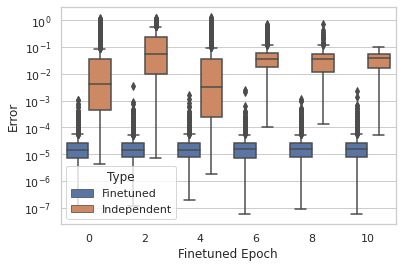

In [227]:
cifar10_df = pd.DataFrame.from_dict(cifar10_dfdict)
ax = sns.boxplot(x='Epoch', y='Error', hue='Type', data=cifar10_df)
ax.set_xlabel("Finetuned Epoch")
ax.set_yscale("log")

In [228]:
cifar100_dfdict = {'Epoch': [], 'Error':[], 'Type': []}
cifar100_ae.cpu()

Sequential(
  (0): Linear(in_features=100, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=100, bias=True)
)

In [230]:
n = len(cifar100_outdicts['origin'])
cifar100_origin = cifar100_outdicts['origin']
origin_error = ((cifar100_ae(cifar100_origin).softmax(dim=1) - cifar100_origin)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([0] * n)
cifar100_dfdict['Error'].extend(origin_error.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Finetuned'] * n)

cifar100_ftnp2 = cifar100_outdicts['finetune2_dict']['finetune_2.pth']
ftnp2_error = ((cifar100_ae(cifar100_ftnp2).softmax(dim=1) - cifar100_ftnp2)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([2] * n)
cifar100_dfdict['Error'].extend(ftnp2_error.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Finetuned'] * n)

cifar100_ftnp4 = cifar100_outdicts['finetune2_dict']['finetune_4.pth']
ftnp4_error = ((cifar100_ae(cifar100_ftnp4).softmax(dim=1) - cifar100_ftnp4)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([4] * n)
cifar100_dfdict['Error'].extend(ftnp4_error.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Finetuned'] * n)

cifar100_ftnp6 = cifar100_outdicts['finetune2_dict']['finetune_6.pth']
ftnp6_error = ((cifar100_ae(cifar100_ftnp6).softmax(dim=1) - cifar100_ftnp6)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([6] * n)
cifar100_dfdict['Error'].extend(ftnp6_error.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Finetuned'] * n)

cifar100_ftnp8 = cifar100_outdicts['finetune2_dict']['finetune_8.pth']
ftnp8_error = ((cifar100_ae(cifar100_ftnp8).softmax(dim=1) - cifar100_ftnp8)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([8] * n)
cifar100_dfdict['Error'].extend(ftnp8_error.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Finetuned'] * n)

cifar100_ftnp10 = cifar100_outdicts['finetune2_dict']['finetune_10.pth']
ftnp10_error = ((cifar100_ae(cifar100_ftnp10).softmax(dim=1) - cifar100_ftnp10)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([10] * n)
cifar100_dfdict['Error'].extend(ftnp10_error.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Finetuned'] * n)

In [243]:
cifar100_ur0 = cifar100_outdicts['unrelated_dict']['model_8.pth']
ur0 = ((cifar100_ae(cifar100_ur0).softmax(dim=1) - cifar100_ur0)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([0] * n)
cifar100_dfdict['Error'].extend(ur0.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Independent'] * n)

cifar100_ur1 = cifar100_outdicts['unrelated_dict']['model_0.pth']
ur1 = ((cifar100_ae(cifar100_ur1).softmax(dim=1) - cifar100_ur1)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([2] * n)
cifar100_dfdict['Error'].extend(ur1.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Independent'] * n)

cifar100_ur2 = cifar100_outdicts['unrelated_dict']['model_9.pth']
ur2 = ((cifar100_ae(cifar100_ur2).softmax(dim=1) - cifar100_ur2)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([4] * n)
cifar100_dfdict['Error'].extend(ur2.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Independent'] * n)

cifar100_ur3 = cifar100_outdicts['unrelated_dict']['model_3.pth']
ur3 = ((cifar100_ae(cifar100_ur3).softmax(dim=1) - cifar100_ur3)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([6] * n)
cifar100_dfdict['Error'].extend(ur3.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Independent'] * n)

cifar100_ur4 = cifar100_outdicts['unrelated_dict']['model_4.pth']
ur4 = ((cifar100_ae(cifar100_ur4).softmax(dim=1) - cifar100_ur4)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([8] * n)
cifar100_dfdict['Error'].extend(ur4.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Independent'] * n)

cifar100_ur5 = cifar100_outdicts['unrelated_dict']['model_15.pth']
ur5 = ((cifar100_ae(cifar100_ur5).softmax(dim=1) - cifar100_ur5)**2).sum(dim=1)
cifar100_dfdict['Epoch'].extend([10] * n)
cifar100_dfdict['Error'].extend(ur5.reshape(-1).tolist())
cifar100_dfdict['Type'].extend(['Independent'] * n)

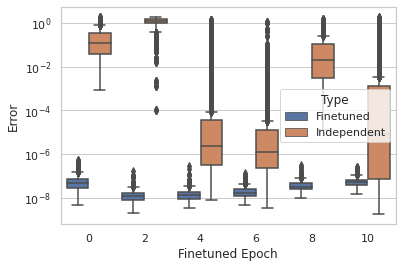

In [244]:
cifar100_df = pd.DataFrame.from_dict(cifar100_dfdict)
ax = sns.boxplot(x='Epoch', y='Error', hue='Type', data=cifar100_df)
ax.set_xlabel("Finetuned Epoch")
ax.set_yscale("log")

In [245]:
tinyimagenet_dfdict = {'Epoch': [], 'Error':[], 'Type': []}
tinyimagenet_ae.cpu()

Sequential(
  (0): Linear(in_features=200, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=128, bias=True)
  (7): ReLU()
  (8): Linear(in_features=128, out_features=128, bias=True)
  (9): ReLU()
  (10): Linear(in_features=128, out_features=200, bias=True)
)

In [247]:
n = len(tinyimagenet_outdicts['origin'])
tinyimagenet_origin = tinyimagenet_outdicts['origin']
origin_error = ((tinyimagenet_ae(tinyimagenet_origin).softmax(dim=1) - tinyimagenet_origin)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([0] * n)
tinyimagenet_dfdict['Error'].extend(origin_error.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Finetuned'] * n)

tinyimagenet_ftnp2 = tinyimagenet_outdicts['finetune0_dict']['finetune_2.pth']
ftnp2_error = ((tinyimagenet_ae(tinyimagenet_ftnp2).softmax(dim=1) - tinyimagenet_ftnp2)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([2] * n)
tinyimagenet_dfdict['Error'].extend(ftnp2_error.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Finetuned'] * n)

tinyimagenet_ftnp4 = tinyimagenet_outdicts['finetune0_dict']['finetune_4.pth']
ftnp4_error = ((tinyimagenet_ae(tinyimagenet_ftnp4).softmax(dim=1) - tinyimagenet_ftnp4)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([4] * n)
tinyimagenet_dfdict['Error'].extend(ftnp4_error.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Finetuned'] * n)

tinyimagenet_ftnp6 = tinyimagenet_outdicts['finetune0_dict']['finetune_6.pth']
ftnp6_error = ((tinyimagenet_ae(tinyimagenet_ftnp6).softmax(dim=1) - tinyimagenet_ftnp6)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([6] * n)
tinyimagenet_dfdict['Error'].extend(ftnp6_error.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Finetuned'] * n)

tinyimagenet_ftnp8 = tinyimagenet_outdicts['finetune0_dict']['finetune_8.pth']
ftnp8_error = ((tinyimagenet_ae(tinyimagenet_ftnp8).softmax(dim=1) - tinyimagenet_ftnp8)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([8] * n)
tinyimagenet_dfdict['Error'].extend(ftnp8_error.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Finetuned'] * n)

tinyimagenet_ftnp10 = tinyimagenet_outdicts['finetune0_dict']['finetune_10.pth']
ftnp10_error = ((tinyimagenet_ae(tinyimagenet_ftnp10).softmax(dim=1) - tinyimagenet_ftnp10)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([10] * n)
tinyimagenet_dfdict['Error'].extend(ftnp10_error.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Finetuned'] * n)

In [248]:
tinyimagenet_ur0 = tinyimagenet_outdicts['unrelated_dict']['model_8.pth']
ur0 = ((tinyimagenet_ae(tinyimagenet_ur0).softmax(dim=1) - tinyimagenet_ur0)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([0] * n)
tinyimagenet_dfdict['Error'].extend(ur0.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Independent'] * n)

tinyimagenet_ur1 = tinyimagenet_outdicts['unrelated_dict']['model_1.pth']
ur1 = ((tinyimagenet_ae(tinyimagenet_ur1).softmax(dim=1) - tinyimagenet_ur1)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([2] * n)
tinyimagenet_dfdict['Error'].extend(ur1.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Independent'] * n)

tinyimagenet_ur2 = tinyimagenet_outdicts['unrelated_dict']['model_9.pth']
ur2 = ((tinyimagenet_ae(tinyimagenet_ur2).softmax(dim=1) - tinyimagenet_ur2)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([4] * n)
tinyimagenet_dfdict['Error'].extend(ur2.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Independent'] * n)

tinyimagenet_ur3 = tinyimagenet_outdicts['unrelated_dict']['model_3.pth']
ur3 = ((tinyimagenet_ae(tinyimagenet_ur3).softmax(dim=1) - tinyimagenet_ur3)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([6] * n)
tinyimagenet_dfdict['Error'].extend(ur3.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Independent'] * n)

tinyimagenet_ur4 = tinyimagenet_outdicts['unrelated_dict']['model_4.pth']
ur4 = ((tinyimagenet_ae(tinyimagenet_ur4).softmax(dim=1) - tinyimagenet_ur4)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([8] * n)
tinyimagenet_dfdict['Error'].extend(ur4.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Independent'] * n)

tinyimagenet_ur5 = tinyimagenet_outdicts['unrelated_dict']['model_7.pth']
ur5 = ((tinyimagenet_ae(tinyimagenet_ur5).softmax(dim=1) - tinyimagenet_ur5)**2).sum(dim=1)
tinyimagenet_dfdict['Epoch'].extend([10] * n)
tinyimagenet_dfdict['Error'].extend(ur5.reshape(-1).tolist())
tinyimagenet_dfdict['Type'].extend(['Independent'] * n)

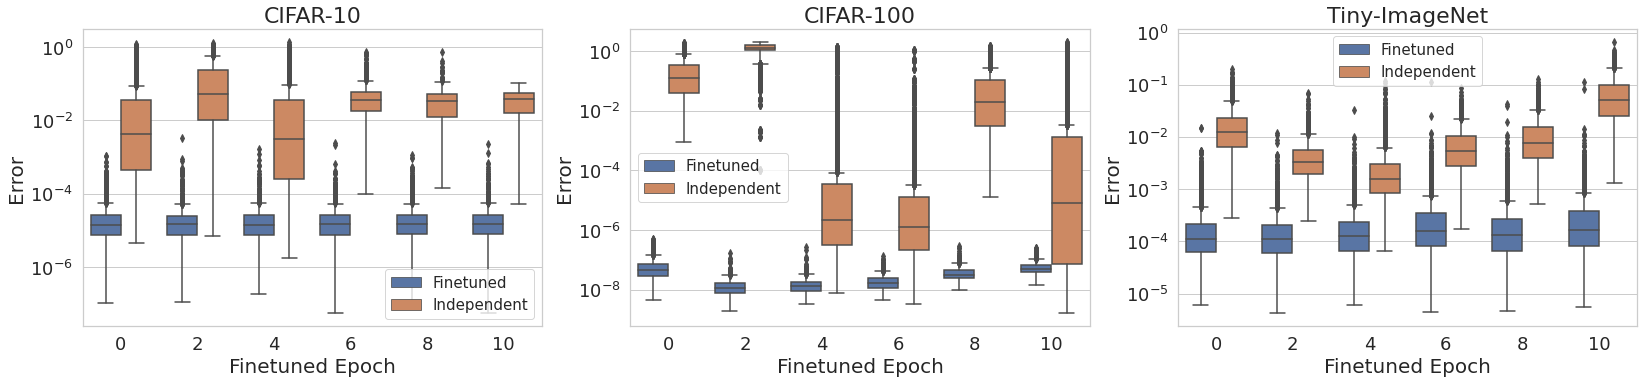

In [250]:
sns.set_theme(style="whitegrid")
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(23, 5.5)

cifar10_df = pd.DataFrame.from_dict(cifar10_dfdict)
sns.boxplot(x='Epoch', y='Error', hue='Type', data=cifar10_df, ax=ax1)
ax1.set_xlabel("Finetuned Epoch", fontsize=20)
ax1.set_ylabel("Error", fontsize=20)
ax1.set_yscale("log")
ax1.legend(loc='lower right', fontsize=15)
ax1.set_title("CIFAR-10", fontsize=22)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)

cifar100_df = pd.DataFrame.from_dict(cifar100_dfdict)
sns.boxplot(x='Epoch', y='Error', hue='Type', data=cifar100_df, ax=ax2)
ax2.set_xlabel("Finetuned Epoch", fontsize=20)
ax2.set_ylabel("Error", fontsize=20)
ax2.set_yscale("log")
ax2.legend(loc='center left', fontsize=15)
ax2.set_title("CIFAR-100", fontsize=22)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)

tinyimagenet_df = pd.DataFrame.from_dict(tinyimagenet_dfdict)
sns.boxplot(x='Epoch', y='Error', hue='Type', data=tinyimagenet_df, ax=ax3)
ax3.set_xlabel("Finetuned Epoch", fontsize=20)
ax3.set_ylabel("Error", fontsize=20)
ax3.set_yscale("log")
ax3.legend(loc='upper center', fontsize=15)
ax3.set_title("Tiny-ImageNet", fontsize=22)
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='y', labelsize=18)

plt.tight_layout()
plt.savefig('figures/modelhash_boxplots.pdf', bbox_inches='tight')
plt.show()